## 선형회귀(lineare regression)

## feature (특징) =>
$$ y =ax +b $$
$$ 우리가 구하고자 하는것는 직선의 기울기(a) 와  y 절편(b) 구하고자 한다  $$ 
$$  (2 |  3)  => feature 는 2다  $$

$$ 기울기(a)가 2이고  y절편(b)가 1이라고 하자  $$
$$  2\times 1 + 1   $$
$$  2\times 2 + 1  $$
$$  2\times 3 + 1  $$
$$   J =(비용/COST/오차/에러) $$ 
$$  정답(y)와 모델에서 출력된 값(\widehat{y})의 차이(error)를 
제곱하고 제곱한 값을 학습데이터 전체를 다  더하고 그 데이터의
갯수로 나눈값을 말함$$
$$ 평균(mean)  $$ 
$$  제곱(square)  $$  
$$  J =  MSE  $$ 
$$ a \leftarrow a- \alpha \frac{\partial J}{\partial a} $$
training data 중 데이터 하나가 공간의 점(벡터)이다.
<table>
    <tr>
        <th>x1</th>
        <th>x2</th>
        <th>x3</th>
        <th>x4</th>
        <th>y(label,정답)</th>
    </tr>
    <tr>
        <td>1</td>
        <td>3</td>
        <td>6</td>
        <td>7</td>
        <td>7</td>
    </tr>
    <tr>
        <td>2</td>
        <td>5</td>
        <td>22</td>
        <td>15</td>
        <td>15</td>
    </tr>
    <tr>
        <td>3</td>
        <td>7</td>
        <td>163</td>
        <td>37</td>
        <td>15</td>
    </tr>
    <tr>
        <td>123</td>
        <td>32</td>
        <td>13</td>
        <td>37</td>
        <td>123</td>
    </tr>
    <tr>
        <td>343</td>
        <td>765</td>
        <td>183</td>
        <td>372</td>
        <td>153</td>
    </tr>
</table>
###  feature가 4개다 
$$  y = w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+w_{4}x_{4}+b $$  
$$ x_{1},x_{2},x_{3},x_{4} $$가 feature가 되고 y가 정답(label) 
$$ 우리가 찾고자 하는것은 뭘까?   $$
(3,4,6,7 | 5)
$$ 우리가 구하고자 하는 것은 w_{1}~w_{4}과 b(bias,y 절편) $$
training data(학습) 데이터는 5개 이므로 5개의 점들과 $\widehat{y}$ 과 거리의 제곱의 합을 5로 나눈 평균이 코스트(비용/에러/오차/손실/LOSS)이다.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("50_Startups.csv")
df[:3]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [3]:
x=df.iloc[:,:-1].values #칼럼(열) 중에서 맨 오른쪽 데이터 제외(정답 제외?)
y=df.iloc[:,-1].values #가장 오른쪽 데이터(정답)

'State'칼럼이 서로 다른 이름의 'New York','Florida','California'을 가지고 있고
데이터 형태(text 형태)를 숫자로 변화 시키고자 함
첫번째 행이 State가 'New York'을 가지고 있다면 'New York' 칼럼만 1이 되고 나머지는
0 되도록 함 (one hot encoding)

<a href="https://needjarvis.tistory.com/565">원핫코딩?<a/>

<img src="2/one.png">

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

### 데이터를 최소값에 빠르게 수렴하도록 하기 위해 원형 형태로 
### 변형함

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

### 제공되는 excel 데이터를 학습 data와 test 데이터로 분리함

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [7]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

$$  \widehat{y} = w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+w_{4}x_{4}+b $$
$$   MSE = \frac{1}{n}\sum_{i=1}^{n}(y-\widehat{y})^{2} $$ 

$$ \widehat{y}= wx+b $$
$$ J(비용/𝐶𝑂𝑆𝑇/오차/에러)=MSE = \frac{1}{n}\sum_{i=0}^{n}(y-\widehat{y})^{2} $$
$$ \frac{\partial J}{\partial w} = -\frac{2}{n}\sum_{i=0}^{n}(y-\widehat{y})x$$
$$ \frac{\partial J}{\partial b} = -\frac{2}{n}\sum_{i=0}^{n}(y-\widehat{y})$$
$$ w\leftarrow w-\alpha \frac{\partial J}{\partial w} $$
$$ b\leftarrow b-\alpha \frac{\partial J}{\partial b} $$

In [8]:
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [9]:
w,b,c=GradientDescent(Xtrain,Ytrain,np.zeros(Xtrain.shape[1]),0,0.02,epochs=15000)

Cost is: 6704725988.3226
Cost is: 40778219.620256975
Cost is: 40777706.10122941
Cost is: 40777706.0993053
Cost is: 40777706.09930529
Cost is: 40777706.09930529
Cost is: 40777706.09930529
Cost is: 40777706.09930529
Cost is: 40777706.09930529
Cost is: 40777706.09930529


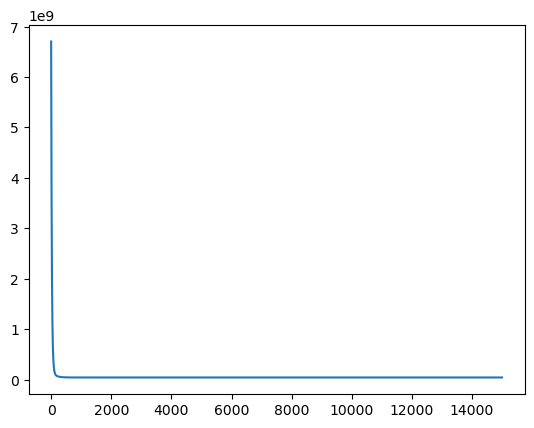

In [10]:
plt.plot(c)

In [11]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

In [12]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.9397108063355776